In [ ]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from keras.regularizers import l2
from datetime import datetime 


# extract folder of chages disease images and non chagas disease images
## We should have two folders ( Chagas and Non-Chagas )
#!unzip "/content/drive/MyDrive/ChagasTest.zip"

#!unzip "/content/drive/MyDrive/ChagasValidation.zip"

In [ ]:
#!unzip "/content/drive/MyDrive/Non-ChagasData_Selected.zip"

In [ ]:
#!unzip "/content/drive/MyDrive/ChagasTraining.zip"


In [ ]:
import os 
import seaborn as sns
from keras.applications.vgg16 import VGG16
training_dir =  "../input/training/training"
test_dir =      "../input/testdata/Test"
validation_dir= "../input/validation/Validation"

training_dir_images = os.path.join(training_dir , "images")
test_dir_images = os.path.join(test_dir , "images")
validation_dir_images = os.path.join(validation_dir , "images")


Training_Non_ChagasFiles = [ "i_0450,i_0389,i_0392 ,i_0395 , i_0440 ,i_0429 , i_0406 , i_0398 , i_0369 , i_0374, i_0348, i_0339,  i_0337 , i_0389 ,i_0334, i_0324 ,i_0279, i_0280, i_0281 , i_0263 , i_0264 , i_0254 , i_0253 , i_0245 , i_0240 , i_0238 , i_0235 , i_0226 , i_0201, i_0184, i_0156, i_0150, i_0148 , i_0152 , i_0099 , i_0018 , i_0001" ]


Validation_Non_ChagasFiles = ["i842 , i806 , i_0583, i_0559 , i_0528 , i_0529 , i_0583 , i_0559 , i_0528 , i_0529 , i_0481, i_0394 , i_0183 , i_0078 , i_0042 , i_0022" ]


Test_Non_ChagasFiles = ["i_0579 , i_0579d , i_0050dd , i_0046d , i_0046dd , i_0047dd , i_0047d , i_0048d , i_0048dd ,i_0049d , i_0049dd , i_0050d , i_0050dd" ]

Non_chagas_files_names = []

Non_chagas_files_names.extend(Training_Non_ChagasFiles)
Non_chagas_files_names.extend(Validation_Non_ChagasFiles)
Non_chagas_files_names.extend(Test_Non_ChagasFiles)

NC = []
for string in Non_chagas_files_names:
  
  NC.extend(string.split(","))

Non_Chagas_Files = []
for values in NC:
  Non_Chagas_Files.append(values.strip())




In [ ]:
training_dir_images

'../input/training/training/images'

In [ ]:
import cv2
from skimage import io


###Extract the Each Image and Label them as 0 or 1  ( label the chagas images as 1 and non chagas as 0)
# we can have seperate list(or any array) for each of them[images and their corresponding labels ] ( one containing the arrays representing Each Image and another containing values/labels )

labels = []
images = []
file_name= []
for file in os.listdir(training_dir_images):
  if file.endswith(".png"):
      
    file_name.append(file.split(".")[0])
    if file.split(".")[0] in Non_Chagas_Files:
      labels.append(0)
      
      images.append(cv2.resize(cv2.imread(os.path.join(training_dir_images , file)), (256, 256)))
      
    else:
      labels.append(1)
      images.append(cv2.resize(cv2.imread(os.path.join(training_dir_images , file)), (256, 256)))

  else:
    pass

for file in os.listdir(test_dir_images):
  if file.endswith(".png"):


    file_name.append(file.split(".")[0])
    if file.split(".")[0] in Non_Chagas_Files:
      labels.append(0)
      images.append(cv2.resize(cv2.imread(os.path.join(test_dir_images , file)), (256, 256)))
      
    else:
      labels.append(1)
      images.append(cv2.resize(cv2.imread(os.path.join(test_dir_images , file)), (256, 256)))
  
  else:
    pass


for file in os.listdir(validation_dir_images):
  if file.endswith(".png"):
    

    file_name.append(file.split(".")[0])
    if file.split(".")[0] in Non_Chagas_Files:
      labels.append(0)
      images.append(cv2.resize(cv2.imread(os.path.join(validation_dir_images , file)), (256, 256)))
    else:
      labels.append(1)
      images.append(cv2.resize(cv2.imread(os.path.join(validation_dir_images , file)), (256, 256)))
  else:
    pass
# Where X is Array containing Arrays( representing Images)
# Where Y is Array containing Labels(values as 0 and 1 ) ( representing labels for each Image)



In [ ]:
import numpy as np
filename_to_label_dict = dict(zip(file_name , labels))
from collections import Counter
Counter(filename_to_label_dict.values() )

Counter({1: 918, 0: 60})

In [ ]:
for file_path in os.listdir("../input/non-chagas-data/Non-ChagasData_Selected"):
  if file_path.endswith(".png"):
    labels.append(0)
      
    images.append(cv2.resize(cv2.imread(os.path.join("../input/non-chagas-data/Non-ChagasData_Selected" , file_path)), (256, 256)))

In [ ]:
import numpy as np
np.unique(np.array(labels) ,return_counts = True )

(array([0, 1]), array([559, 940]))

In [ ]:
#imagess = []
#for imagesss in images:
#  imagess.append(cv2.resize(imagesss , (256 , 256 )))

In [ ]:

# Split the Images and labels into Train , Test and Validation Data
print(type(images))
images = np.array(images , dtype = "float32")
labels = np.array(labels, dtype = 'int32')
print(type(images))


<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
print(images.shape[0])
print(labels.shape[0])


1499
1499


In [ ]:

#n = np.arange(images.shape[0])
#np.random.shuffle(n)
#images = images[n]
#labels = labels[n]


In [ ]:
import random

# Shuffle
from sklearn.utils import shuffle
#images, labels = shuffle(images, labels, random_state=10)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2 , random_state=10)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5 , random_state=10)



In [ ]:
test_labels

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

In [ ]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_images.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 1199
Number of validation examples: 150
Number of testing examples: 150
Training images are of shape: (1199, 256, 256, 3)
Training labels are of shape: (1199,)
Validation images are of shape: (150, 256, 256, 3)
Validation labels are of shape: (150,)
Test images are of shape: (150, 256, 256, 3)
Test labels are of shape: (150,)


In [ ]:
train_images = train_images / 255.0 
val_images = val_images / 255.0
test_images = test_images / 255.0

In [ ]:
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Reshape, Permute, Activation, Input, \
    add, multiply ,  Dense, Conv2D, Activation, Flatten
from keras.layers import concatenate, core, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.layers.core import Lambda
#import keras.backend as K
from keras.layers import Input, Conv2D, UpSampling2D, BatchNormalization, Activation, add,average,concatenate , Conv2DTranspose
from keras.layers.core import Lambda
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
#%tensorflow_version 1.x
from keras.callbacks import TensorBoard
from keras.callbacks import CSVLogger
from glob import glob
from sklearn.model_selection import train_test_split


import keras
import tensorflow as tf
#import keras.backend.tensorflow_backend as K
import keras.backend as K
import matplotlib.pyplot as plt

import tensorflow as tf
import cv2


import numpy as np



In [ ]:

from keras.models import Sequential, Model 
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 

from sklearn.metrics import accuracy_score, confusion_matrix

from keras import backend as K
from keras.losses import binary_crossentropy
import tensorflow as tf
import os
import skimage.io as io
import skimage.transform as trans
import cv2
import warnings
warnings.filterwarnings("ignore")


## Metrics

In [ ]:


def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall


# One Hot Encodeing

In [ ]:
#One hot encode y values for neural network. 
from keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
val_labels_one_hot = to_categorical(val_labels)


# **Data_Augmentation**

In [ ]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Conv2D,Add
from tensorflow.keras.layers import SeparableConv2D,ReLU
from tensorflow.keras.layers import BatchNormalization,MaxPool2D
from tensorflow.keras.layers import GlobalAvgPool2D
from tensorflow.keras import Model
# creating the Conv-Batch Norm block

def conv_bn(x, filters, kernel_size, strides=1):
    
    x = Conv2D(filters=filters, 
               kernel_size = kernel_size, 
               strides=strides, 
               padding = 'same', 
               use_bias = False)(x)
    x = BatchNormalization()(x)
    return x
# creating separableConv-Batch Norm block

def sep_bn(x, filters, kernel_size, strides=1):
    
    x = SeparableConv2D(filters=filters, 
                        kernel_size = kernel_size, 
                        strides=strides, 
                        padding = 'same', 
                        use_bias = False)(x)
    x = BatchNormalization()(x)
    return x
# entry flow

def entry_flow(x):
    
    x = conv_bn(x, filters =32, kernel_size =3, strides=2)
    x = ReLU()(x)
    x = conv_bn(x, filters =64, kernel_size =3, strides=1)
    tensor = ReLU()(x)
    
    x = sep_bn(tensor, filters = 128, kernel_size =3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 128, kernel_size =3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=128, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    
    x = ReLU()(x)
    x = sep_bn(x, filters =256, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters =256, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=256, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    
    x = ReLU()(x)
    x = sep_bn(x, filters =728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters =728, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=728, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    return x
# middle flow

def middle_flow(tensor):
    
    for _ in range(2):
        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        tensor = Add()([tensor,x])
        
    return tensor
# exit flow

def exit_flow(tensor):
    
    x = ReLU()(tensor)
    x = sep_bn(x, filters = 728,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 1024,  kernel_size=3)
    x = MaxPool2D(pool_size = 3, strides = 2, padding ='same')(x)
    
    tensor = conv_bn(tensor, filters =1024, kernel_size=1, strides =2)
    x = Add()([tensor,x])
    
    x = sep_bn(x, filters = 1536,  kernel_size=3)
    #x = ReLU()(x)
    #x = sep_bn(x, filters = 2048,  kernel_size=3)
    x = Flatten()(x)
    
    x = Dense(units = 512 , activation = 'relu'  )(x)
    x = Dropout(0.7)(x)
    x = Dense(units = 128 , activation = 'relu'  )(x)
    x = Dropout(0.5)(x)
    x=  Dense(units = 64 , activation = 'relu' )(x)
    x = Dropout(0.3)(x)
    
    x  = Dense(units = 1 ,kernel_regularizer = tf.keras.regularizers.l2(0.01), activation = 'linear')(x)
    
    return x
# model code

input = Input(shape = (256,256,3))
x = entry_flow(input)
x = middle_flow(x)
output = exit_flow(x)

model = Model (inputs=input, outputs=output)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 128, 128, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_221 (BatchN (None, 128, 128, 32) 128         conv2d_36[0][0]                  
__________________________________________________________________________________________________
re_lu_227 (ReLU)                (None, 128, 128, 32) 0           batch_normalization_221[0][0]    
____________________________________________________________________________________________

In [ ]:
model.compile(optimizer=Adam(lr=7.00E-05), loss = 'hinge', metrics = ['accuracy',precision,recall])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=5, verbose = 1, mode='min', restore_best_weights = True)

learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'val_accuracy', 
    patience = 3, 
    verbose = 1, 
    factor = 0.3, 
    #min_lr = 0.000001
    )


model_checkpoint1 = keras.callbacks.ModelCheckpoint('Xception1.hdf5', monitor='val_accuracy',verbose=1, mode='max',save_best_only=True)
csv_logger = CSVLogger('training_model_metrics_values.log', append=True, separator=';')



In [ ]:
history6 = model.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 40, 
    validation_data=(val_images, val_labels), 
    callbacks=[ model_checkpoint1 ,csv_logger  ])

Epoch 1/40
600/600 [==============================] - 30s 47ms/step - loss: 2.1090 - accuracy: 0.6366 - precision: 0.6281 - recall: 0.6182 - val_loss: 9.1726 - val_accuracy: 0.3400 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.34000, saving model to Xception1.hdf5
Epoch 2/40
600/600 [==============================] - 28s 46ms/step - loss: 1.5572 - accuracy: 0.7537 - precision: 0.7147 - recall: 0.6736 - val_loss: 0.2226 - val_accuracy: 0.9533 - val_precision: 0.8333 - val_recall: 0.8333

Epoch 00002: val_accuracy improved from 0.34000 to 0.95333, saving model to Xception1.hdf5
Epoch 3/40
600/600 [==============================] - 28s 46ms/step - loss: 1.4918 - accuracy: 0.7604 - precision: 0.7366 - recall: 0.7271 - val_loss: 0.3769 - val_accuracy: 0.9533 - val_precision: 0.8600 - val_recall: 0.8733

Epoch 00003: val_accuracy did not improve from 0.95333
Epoch 4/40
600/600 [==============================] - 28s 47ms/step - loss: 1

In [ ]:
model.load_weights("./Xception1.hdf5")


In [ ]:

print("Train_Accuracy" )
train_results = model.evaluate(train_images, train_labels)

print("Val_Accuracy" )
val_results = model.evaluate(val_images, val_labels)

print("Test_Accuracy" )
test_results = model.evaluate(test_images, test_labels)


Train_Accuracy
38/38 [==============================] - 3s 70ms/step - loss: 0.0709 - accuracy: 0.9917 - precision: 0.9865 - recall: 1.0000
Val_Accuracy
5/5 [==============================] - 0s 66ms/step - loss: 0.3919 - accuracy: 0.9867 - precision: 0.9821 - recall: 1.0000
Test_Accuracy
5/5 [==============================] - 0s 64ms/step - loss: 0.8396 - accuracy: 0.9600 - precision: 0.9536 - recall: 0.9784


In [ ]:
model3_pred = model.predict(test_images)
pred = [1 if x > 0.5 else 0 for x in list(model3_pred[: , 0])]
Xception_pred = np.array(pred)
Xception_pred


array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

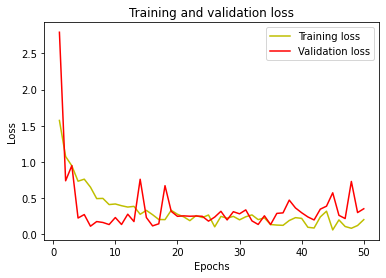

In [ ]:
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



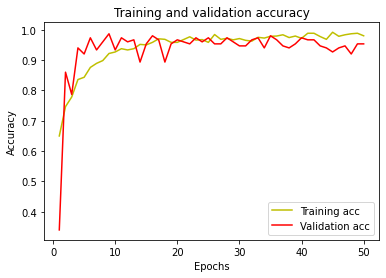

In [ ]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()